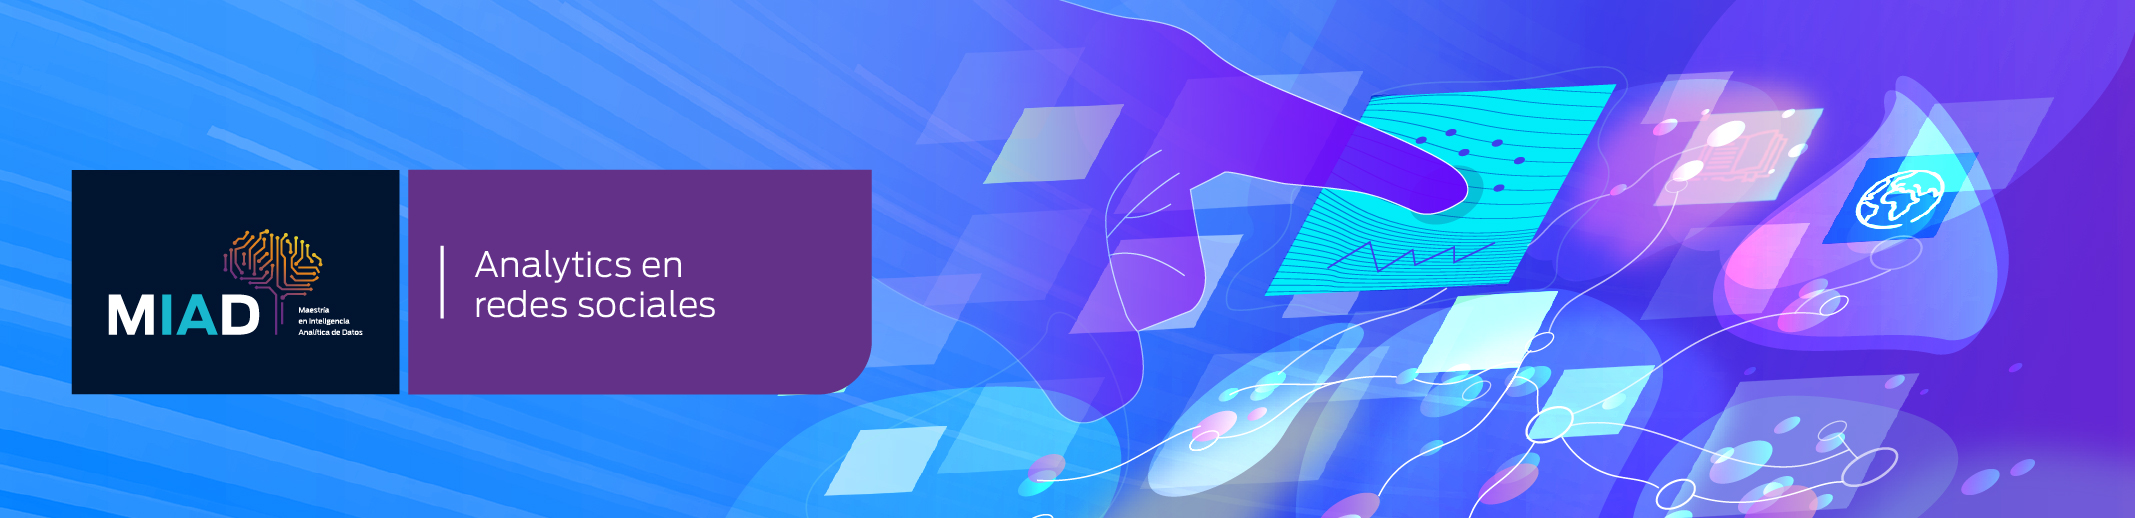

# Tutorial: Cálculo de medidas de centralidad y prestigio en Python

En este notebook aprenderá a realizar el estudio de centralidad y prestigio de una red, para lo anterior se usará primordialmente la librería *NetworkX* con la cuál ya se ha familiarizado.

Este cuaderno está diseñado como guía para que implemente de primera mano las diferentes medidas de centralidad dentro de una red y comenzar a comprender la importancia de los nodos dentro de la estrucuta de una red. Por lo tanto, a continuación enocontrarán un ejercicio guiado para aplicar los diferentes conceptos.

#### Expectativas del tutorial

En este tutorial esperamos que usted logre adquirir las siguientes habilidades:
+ Implementar y calcular diferentes algoritmos para el calculo de medidas de centralidad y prestigio.
+ Hacer uso de las funciones dentro de la librería *NetworkX*.
+ Profundizar en los conceptos de centralidad y prestigio.

#### Tabla de Contenido

**Medidas de los nodos**
+ [Grado](#gradonodo)
+ [Centralidad Eigenvector](#eigenvector)
+ [Betweenness](#betweenness)
+ [Closeness](#closeness)
+ [Page Rank](#pagerank)
+ [Clustering](#clustering)


**Medidas de la red**
+ [Distribución del grado](#distnodo)
+ [Diametro de la red](#diametro)
+ [Densidad de la red](#densidad)
+ [Reciprocidad de la red](#reciprocidad)
+ [Asortatividad](#asortatividad)

Antes de iniciar carguemos las librerias que vamos a utilizar

In [2]:
# Librerias que vamos a usar
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Para este ejercicio vamos a utilizar la red de Facebook de una figura pública en Colombia. Esta figura es Claudia Lopez, asi que vamos a cargar y estudiar su red.

Carguemos el archivo de red mediante *Pandas*, guardando la información en ``nodos`` y en ``arcos``.

In [3]:
# Nodos y arcos de la red
nodos = pd.read_csv('NodosCL.csv', sep=',', index_col="Id")
arcos = pd.read_csv('ArcosCL.csv', sep=',', index_col="Id")

Los archivos poseen información que no es necesaria asi que podemos remover esas columnas.

In [4]:
# Limpiemos las bases
nodos = nodos.drop(columns=['timeset','username','post_activity','fan_count','talking_about_count','users_can_post','link'])
arcos = arcos.drop(columns=['Label','timeset'])

Verifiquemos cómo se estructuran los archivos.

In [5]:
nodos

,Label,category
Id,,
158190387560587,Claudia López,Public Figure
214920142051670,Alonso Salazar,Public Figure
155088471199849,Senado Colombia,Government Organization
1524779097779678,Curso Tendencias en Innovación Política,School
225695683920,Iván Cepeda Castro,Politician
...,...,...
136117926476442,María Clara Name Ramírez,Politician
105597260718,Lucho Garzon,Public Figure
231038493528,IVAN NAME VASQUEZ SENADOR,Government Official


In [6]:
arcos

,Source,Target,Type,Weight
Id,,,,
0,158190387560587,214920142051670,Directed,1
1,158190387560587,155088471199849,Directed,1
2,158190387560587,1524779097779678,Directed,1
3,158190387560587,225695683920,Directed,1
4,158190387560587,126450910743068,Directed,1
...,...,...,...,...
1581,105597260718,148349507804,Directed,1
1582,136581166383109,425542070822039,Directed,1
1583,136581166383109,281475481867946,Directed,1


Con los datos ya cargados, pasemos a construir la red ``G``, como una red **dirigida**.

In [7]:
# Construir red
G=nx.DiGraph()

# Nodos
# Agregar los nodos por su identificador
G.add_nodes_from(nodos.index)
# Agregar los atributos de los nodos
# Primero recorrer los nodos que se agregaron a la red
for nodo in G.nodes:
    # En cada nodo recorremos los atributos de los nodos
    for atr in nodos:
        # Agregar cada atributo al nodo
        G.nodes[nodo][atr]=nodos[atr][nodo]
        
# Arcos
# Agregar los arcos
G.add_edges_from([tuple(x) for x in arcos[['Source','Target']].to_numpy()])

## Nota: para este ejercicio no requerimos los pesos dado que los pesos son siempre uno (1)

Validemos el número de nodos.

In [8]:
G.number_of_nodes()

369

*Resultado esperado:* ``369``.

Validemos el número de arcos.

In [9]:
G.number_of_edges()

1586

*Resultado esperado:* ``1586``.

Por último, antes de comenzar a estudiar las medidas de centralidad y prestigio, visualicemos la red.

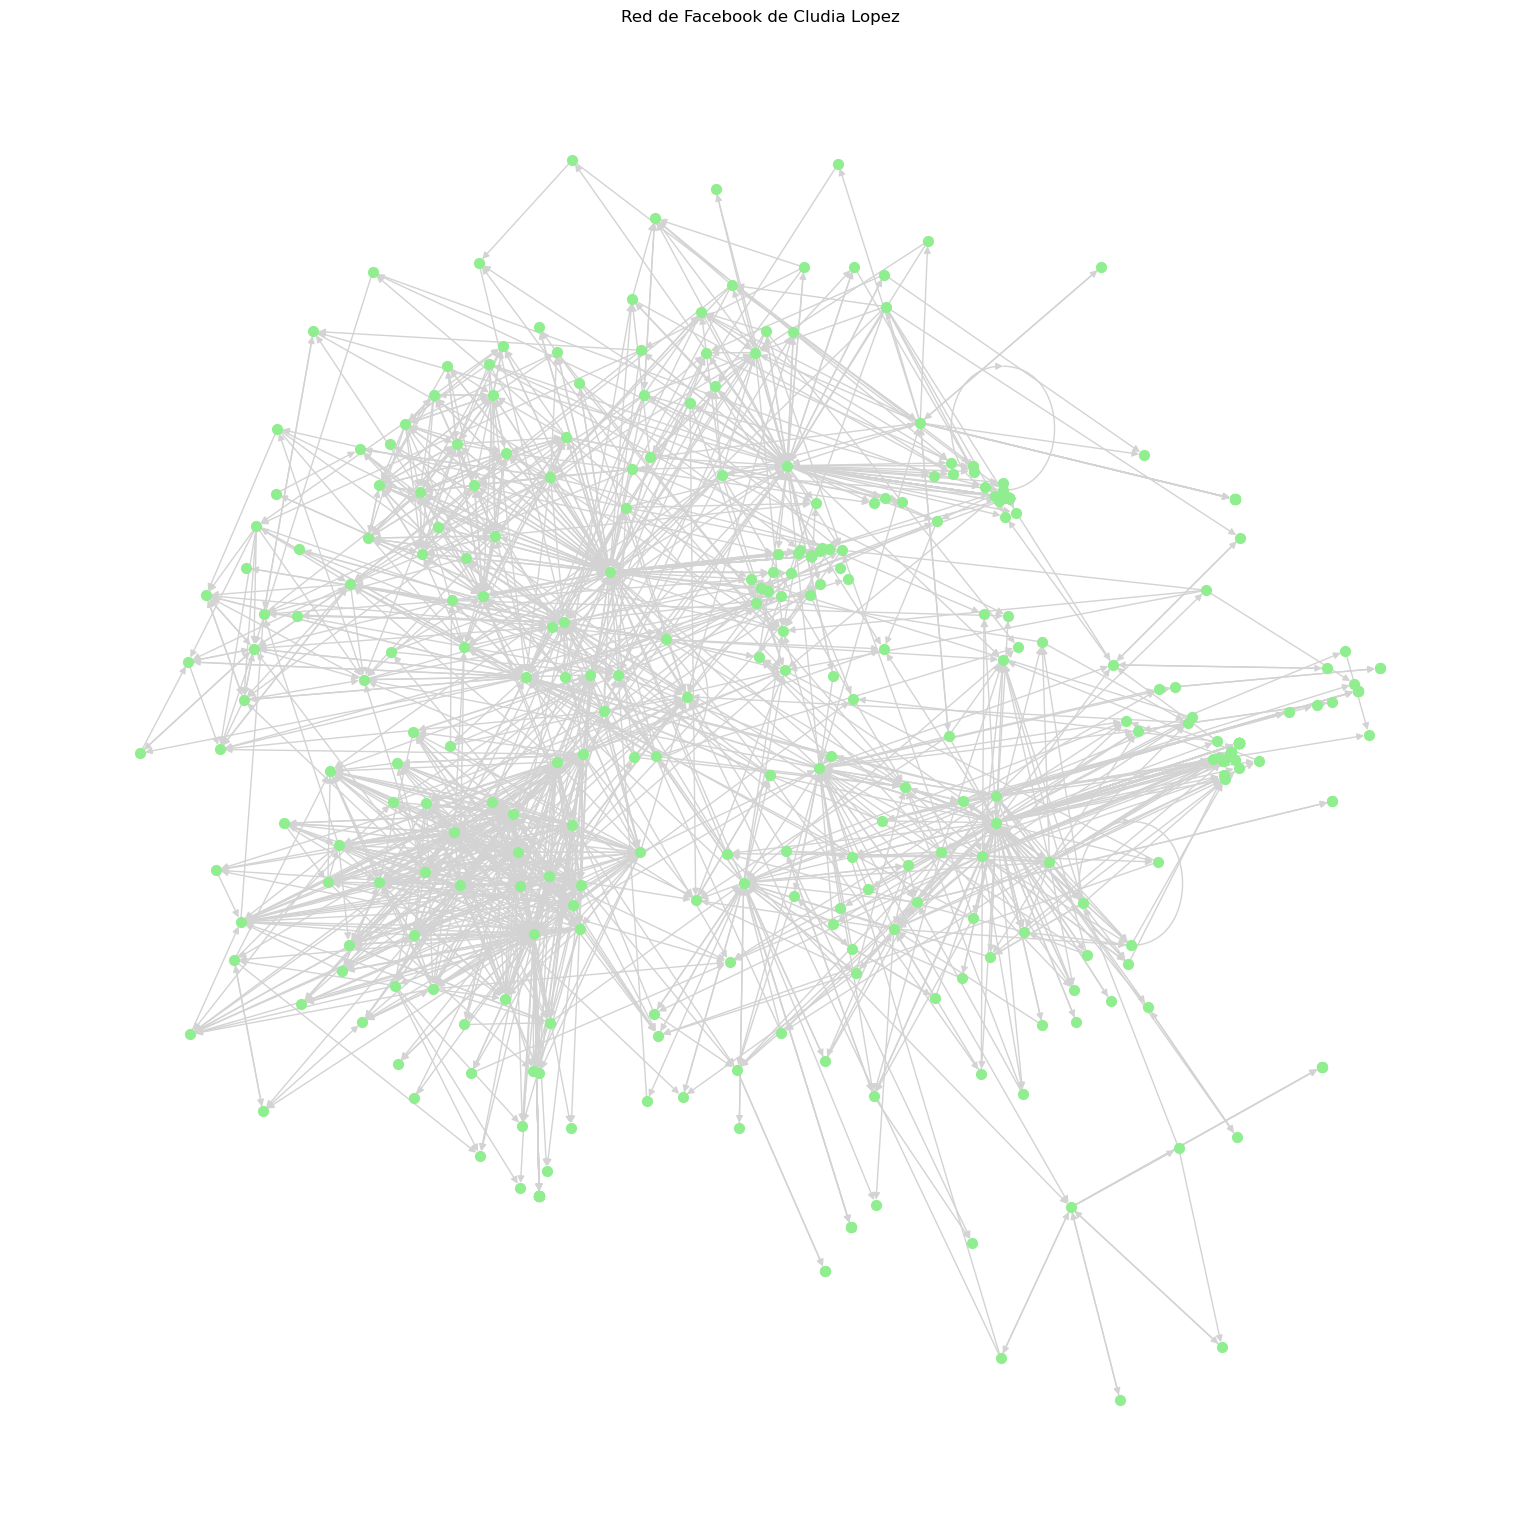

In [10]:
# Lienzo de la gráfica
fig=plt.figure(figsize=(15,15))

# Después se genera el gráfico
nx.draw_kamada_kawai(G, node_size=50, node_color='lightgreen', edge_color='lightgray')

plt.title('Red de Facebook de Cludia Lopez')
# Por último se muestra la gráfica
plt.show()

## Medidas de los nodos

<a id = "gradonodo"></a>
### Grado de un nodo

El *grado* de un nodo es el número de arcos que salen y/o llegan de este.<br>
Existen tres formas de medir el grado de un *nodo*:
1. ``.in_degree(nodo)``, que mide el número de arcos que llegan a un nodo determinado (*nota:* solo válido para redes dirigidas).
2. ``.out_degree(nodo)``, que mide el número de arcos que salen de un nodo determinado (*nota:* solo válido para redes dirigidas).
3. ``.degree(nodo)``, que mide el número total de arcos de un nodo (*nota:* válido para redes dirigidas y no dirigidas).

Tomemos el nodo *463250697028789* que es identificador para *Pedalea Por Bogotá*.

Encontremos el ``out_degree``:

In [11]:
G.out_degree(463250697028789)

3

In [12]:
nodos.loc[nodos.index==463250697028789]

,Label,category
Id,,
463250697028789,Pedalea Por Bogotá,Community


*Resultado esperado:* ``3``.

Encontremos el ``in_degree``:

In [13]:
G.in_degree(463250697028789)

14

*Resultado esperado:* ``14``.

Encontremos el grato total, ``degree``:

In [14]:
G.degree(463250697028789)

17

*Resultado esperado:* ``17``.

Si se corre la función ``degree()``, ``in_degree()`` o ``out_degree()`` sin especidicar un nodo, cualquiera de estas regresa un diccionario donde las llaves son el *id* de los nodos y los valores son los grados solicitados.

In [29]:
# Guardemos los nodos en un diccionario
grados=G.degree()
grados

DiDegreeView({158190387560587: 39, 214920142051670: 22, 155088471199849: 12, 1524779097779678: 5, 225695683920: 9, 126450910743068: 98, 62260589592: 16, 97041406678: 45, 14302129065: 42, 148349507804: 102, 274992429193756: 87, 275454095938554: 26, 324978082784: 6, 110955563771: 8, 970102866336353: 3, 193631447514110: 42, 468651299852439: 10, 817856801562594: 10, 287748444683052: 14, 1779909538943763: 2, 438973352975895: 5, 307867347023: 104, 354150288106600: 2, 333705480171682: 1, 148025418658307: 1, 113832645368292: 1, 635962713207245: 10, 418592904995232: 1, 1621221168148375: 8, 583181875117786: 6, 118465851142: 20, 399606216901382: 1, 192669784168: 10, 663248913807492: 3, 100150961991: 11, 111841478834264: 2, 1504195516527269: 2, 190240301020051: 1, 110020299887: 3, 411890848859847: 3, 248362585349365: 1, 1436497756637713: 2, 166059236849588: 1, 205041803007679: 4, 611845628855418: 1, 1224359854257386: 2, 531169226939488: 3, 160045201668: 3, 1248994028541934: 1, 837731992980860: 1, 

**Ejercicio**: Encuentre el nodo más conectado.

In [25]:
# Escriba aquí su código
persona_entida = ''
conexiones = 0
for clave, valor in grados:
    if valor > conexiones:
        persona_entida=clave
        conexiones = valor 

print(f'La Persona/Entidad con mas conexiones es: {persona_entida} - {nodos.loc[nodos.index==persona_entida]} total conexiones: {conexiones} ')

La Persona/Entidad con mas conexiones es: 307867347023 -                               Label         category
Id                                                  
307867347023  Partido Alianza Verde  Political Party total conexiones: 104 


*Resultado esperado:* ``Partido Alianza Verde`` con id ``307867347023``.

<a id = "eigenvector"></a>
### Centralidad Eigenvector

La centralidad eigenvector calcula la centralidad de un nodo en función de la centralidad de sus vecinos. La centralidad eigenvector para el nodo $i$ es el $i$-ésimo elemento del vector definido por la ecuación:
$$Ax=\lambda x$$
donde $A$ es la matriz de adyacencia de la red con valor propio $\lambda$. En virtud del teorema de Perron-Frobenius, existe una solución única $x$, donde todas sus entradas son positivas, si $\lambda$ es el valor propio más grande de la matriz de adyacencia $A$.<br>

*Mark E. J. Newman. Networks: An Introduction. Oxford University Press, USA, 2010, pp. 169.*

Para encontrar la centralidad eigenvector de cada nodo se utiliza la función ``nx.eigenvector_centrality(G)``, la cuál regresa un diccionario donde las llaves son el *id* de los nodos y los valores son la centralidad eigenvector.

In [18]:
nx.eigenvector_centrality(G)

{158190387560587: 0.011469939246384293,
 214920142051670: 0.001251877157585825,
 155088471199849: 0.0009548698556044195,
 1524779097779678: 0.000983827109549825,
 225695683920: 0.0011394235789043542,
 126450910743068: 0.04422099108353496,
 62260589592: 0.03576557140429896,
 97041406678: 0.04703849007262704,
 14302129065: 0.07407428649327323,
 148349507804: 0.10541233174422021,
 274992429193756: 0.232543089074928,
 275454095938554: 0.0009175564888107158,
 324978082784: 0.0011481539106344663,
 110955563771: 0.0011655687104146426,
 970102866336353: 0.0009175564888107158,
 193631447514110: 0.01867896802037338,
 468651299852439: 0.010257736073576496,
 817856801562594: 0.0013907287143662681,
 287748444683052: 0.0011144787095488421,
 1779909538943763: 0.0010067112586611784,
 438973352975895: 0.0009234661778527058,
 307867347023: 0.00229904890005953,
 354150288106600: 0.00010014635373185238,
 333705480171682: 0.00010014635373185238,
 148025418658307: 0.00010014635373185238,
 113832645368292: 0

**Ejercicio**: Encuentre el nodo con mayor Centralidad Eigenvector

In [30]:
# Escriba aquí su código
centralidad_dict = nx.eigenvector_centrality(G)

id_nodo = ''
centralidad = 0.0

for clave, valor in centralidad_dict.items():
    if valor > centralidad:
        id_nodo=clave
        centralidad = valor 

print(f'La Persona/Entidad con mayor centralidad es : {id_nodo} - {nodos.loc[nodos.index==id_nodo]} Centralidad: {centralidad} ')

La Persona/Entidad con mayor centralidad es : 57022040758 -                                     Label        category
Id                                                       
57022040758  CICLOPASEOS DE LOS MIERCOLES  Travel Company Centralidad: 0.26206702045349395 


In [21]:
centralidad_dict = nx.eigenvector_centrality(G)
type(centralidad_dict)

for clave, valor in centralidad_dict:
    print(clave)

TypeError: cannot unpack non-iterable int object

*Resultado esperado:* ``CICLOPASEOS DE LOS MIERCOLES`` con id ``57022040758``.

<a id = "betweenness"></a>
### Betweenness

La centralidad de intermediación (betweenness) de un nodo $v$ es la suma de la fracción de los todos los caminos más cortos entre todos los pares que pasan por $v$.
$$c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$$
Donde $V$ es el set de nodos, $\sigma(s, t)$ es el número de caminos más cortos entre $(s, t)$, y $\sigma(s, t|v)$ es el número de esos caminos que pasan por un nodo $v$ que no sean $s,t$. Si $s = t$, $\sigma(s, t) = 1$,y si $v \in {s, t}$,$\sigma(s, t|v) = 0$. <br>

*Ulrik Brandes: On Variants of Shortest-Path Betweenness Centrality and their Generic Computation. Social Networks 30(2):136-145, 2008. https://doi.org/10.1016/j.socnet.2007.11.001*

Para encontrar la centralidad de intermediación de cada nodo se utiliza la función ``nx.betweenness_centrality(G)``, la cuál regresa un diccionario donde las llaves son el *id* de los nodos y los valores son la centralidad de intermediación.

In [31]:
nx.betweenness_centrality(G)

{158190387560587: 0.13812897098019608,
 214920142051670: 0.022465249312561164,
 155088471199849: 0.01788867378918913,
 1524779097779678: 0.0,
 225695683920: 0.0029857808542206135,
 126450910743068: 0.12201106413746167,
 62260589592: 0.005366770528426659,
 97041406678: 0.03701411562128515,
 14302129065: 0.050710032346851994,
 148349507804: 0.13012607098002651,
 274992429193756: 0.06783072500007738,
 275454095938554: 0.018033366268616312,
 324978082784: 0.0013772064921217866,
 110955563771: 0.002726276507522805,
 970102866336353: 0.0027544129842435733,
 193631447514110: 0.04197767085955356,
 468651299852439: 0.004126589496176928,
 817856801562594: 0.005892414912747219,
 287748444683052: 0.005502590429226127,
 1779909538943763: 0.0,
 438973352975895: 0.0013772064921217866,
 307867347023: 0.14862699372955634,
 354150288106600: 0.0,
 333705480171682: 0.0,
 148025418658307: 0.0,
 113832645368292: 0.0,
 635962713207245: 0.0003503396827277292,
 418592904995232: 0.0,
 1621221168148375: 0.004465

<a id = "closeness"></a>
### Closeness

La centralidad de proximidad (closeness) de un nodo $u$ es el recíproco de la distancia de camino más corto promedio a $u$ en todos los $n-1$ nodos alcanzables.
$$C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$$
donde $d(v, u)$ es la distancia de camino más corta entre $v$ y $u$, y $n$ es el número de nodos que pueden llegar a $u$. 

Observe que los valores más altos de cercanía indican una mayor centralidad.

*Linton C. Freeman: Centrality in networks: I. Conceptual clarification. Social Networks 1:215-239, 1979. https://doi.org/10.1016/0378-8733(78)90021-7*

Para encontrar la centralidad de proximidad de cada nodo se utiliza la función ``nx.closeness_centrality(G)``, la cuál regresa un diccionario donde las llaves son el *id* de los nodos y los valores son la centralidad de proximidad.

In [32]:
nx.closeness_centrality(G)

{158190387560587: 0.15024671630259182,
 214920142051670: 0.1279267089288918,
 155088471199849: 0.11954076785514696,
 1524779097779678: 0.11937745794188331,
 225695683920: 0.13351847975599546,
 126450910743068: 0.17096087755754474,
 62260589592: 0.18637819116493856,
 97041406678: 0.21185129246310785,
 14302129065: 0.2152840680354267,
 148349507804: 0.23908153571029392,
 274992429193756: 0.15073373969417236,
 275454095938554: 0.11581907520710379,
 324978082784: 0.13070764308354763,
 110955563771: 0.129170440821256,
 970102866336353: 0.11678368890089116,
 193631447514110: 0.14419025952140208,
 468651299852439: 0.13839690087991718,
 817856801562594: 0.11832406792786812,
 287748444683052: 0.1279267089288918,
 1779909538943763: 0.11692894224529526,
 438973352975895: 0.11596348801908272,
 307867347023: 0.1492820503873264,
 354150288106600: 0.10208860306400037,
 333705480171682: 0.10296918900900043,
 148025418658307: 0.10296918900900043,
 113832645368292: 0.10296918900900043,
 635962713207245:

**Ejercicio**: Encuentre el quinto nodo con mayor closeness

In [51]:
# Escriba aquí su código


diccionario = nx.closeness_centrality(G)
lista = [[clave,valor] for clave, valor in diccionario.items()]



lista_ordenada = sorted(lista, key=lambda x: x[1], reverse=True)

lista_ordenada

print(f'La Persona/Entidad con mayor Closeness es : {lista_ordenada[4][0]} - {nodos.loc[nodos.index==lista_ordenada[4][0]]} Closeness: {lista_ordenada[4][1]} ')

La Persona/Entidad con mayor Closeness es : 186676354713214 -                            Label category
Id                                       
186676354713214  James Rodriguez  Athlete Closeness: 0.19085180172559635 


*Resultado esperado:* ``James Rodriguez`` con id ``186676354713214``.

<a id = "pagerank"></a>
### Page Rank

PageRank calcula una clasificación de los nodos en el gráfico G basándose en la estructura de los enlaces entrantes. Originalmente fue diseñado como un algoritmo para clasificar páginas web, donde PageRank funciona contando el número y la calidad de los enlaces a una página para determinar una estimación aproximada de la importancia del sitio web. La suposición subyacente es que es probable que los sitios web más importantes reciban más enlaces de otros sitios web.

Para encontrar la clasificación de Page Rank de cada nodo se utiliza la función ``nx.pagerank(G)``, la cuál regresa un diccionario donde las llaves son el *id* de los nodos y los valores son la clasificación de Page Rank.

In [52]:
nx.pagerank(G)

{158190387560587: 0.008348242822775404,
 214920142051670: 0.0030717410004660957,
 155088471199849: 0.006084807968580955,
 1524779097779678: 0.003483167396916474,
 225695683920: 0.008147359479240779,
 126450910743068: 0.010318763212801983,
 62260589592: 0.006144501960377909,
 97041406678: 0.013303349980477107,
 14302129065: 0.017398669234467614,
 148349507804: 0.02292077295199348,
 274992429193756: 0.007982537377965088,
 275454095938554: 0.0014296813717903126,
 324978082784: 0.009314771683646085,
 110955563771: 0.002330369803116976,
 970102866336353: 0.0014296813717903126,
 193631447514110: 0.014128593213621915,
 468651299852439: 0.0029311166707628004,
 817856801562594: 0.003032197190841644,
 287748444683052: 0.0017878855958501042,
 1779909538943763: 0.0015678548749014616,
 438973352975895: 0.0021530534810106023,
 307867347023: 0.015828339327027804,
 354150288106600: 0.0012453270416274865,
 333705480171682: 0.0012453270416274865,
 148025418658307: 0.0012453270416274865,
 113832645368292

<a id = "clustering"></a>
### Clustering

Para grafos no dirigidos, el clustering de un nodo $u$ es la fracción de triángulos posibles a través de ese nodo que existen,

$$c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},$$

donde $T(u)$ es el número de triángulos a través del nodo $u$ y $deg(u)$es el grado de $u$.

Para encontrar el clustering de cada nodo se utiliza la función ``nx.clustering(G)``, la cuál regresa un diccionario donde las llaves son el *id* de los nodos y los valores son el clustering.

In [53]:
nx.clustering(G)

{158190387560587: 0.07744565217391304,
 214920142051670: 0.05043859649122807,
 155088471199849: 0.015873015873015872,
 1524779097779678: 0.15,
 225695683920: 0.08823529411764706,
 126450910743068: 0.015397595443999157,
 62260589592: 0.25630252100840334,
 97041406678: 0.09826883910386966,
 14302129065: 0.0357981220657277,
 148349507804: 0.06161045038019107,
 274992429193756: 0.15169445938676707,
 275454095938554: 0.07098765432098765,
 324978082784: 0.25,
 110955563771: 0.24074074074074073,
 970102866336353: 0,
 193631447514110: 0.049824150058616644,
 468651299852439: 0.13333333333333333,
 817856801562594: 0.18181818181818182,
 287748444683052: 0.23863636363636365,
 1779909538943763: 1.0,
 438973352975895: 0.375,
 307867347023: 0.029047976011994003,
 354150288106600: 0,
 333705480171682: 0,
 148025418658307: 0,
 113832645368292: 0,
 635962713207245: 0.16666666666666666,
 418592904995232: 0,
 1621221168148375: 0.2037037037037037,
 583181875117786: 0.17857142857142858,
 118465851142: 0.143

**Ejercicio**: Encuentre el coeficiente de clustering promedio del subgrafo formado por solo las figuras públicas.

*Ayuda*: para generar un subgrafo a partir de una red se usar la función ``.subgraph()`` que recibe la lista de los nodos con los que se quiere construir el subgrafo.<br>
*Extra*: Investigue la función [``.average_clustering()``](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering)

In [54]:
# Paso 1: Realizar la lista de los nodos con categoría "Public Figure"
figuras_publicas=[]
category=nx.get_node_attributes(G,'category')
for i in category.keys():
    if category[i] == 'Public Figure':
        figuras_publicas.append(i)

In [55]:
# Paso 2: Generar el subgrafo
PF = G.subgraph(figuras_publicas)



In [57]:
# Paso 3: Calcular el clustering promedio

# Escriba aquí su código
coheficiente = nx.average_clustering(PF)
print(f'El coheficientes es: {coheficiente}')

El coheficientes es: 0.03768115942028986


*Resultado esperado:* ``0.0376811``.

## Medidas de la red

<a id = "distnodo"></a>
### Distribución del grado

La distribución del grado permite tener una idea de que tan concentrado o disperso se encuentra el grado, permitiendo entender si hay o no una gran cantidad de nodos con un grado elevado en la red.

**Paso 1**: Guardar en una lista los grados de los nodos en la red.

In [58]:
#Distrucion del grado
grado=[]
for node in G.nodes():
    grado.append(G.degree(node))

**Paso 2**: Generar el histograma del grado

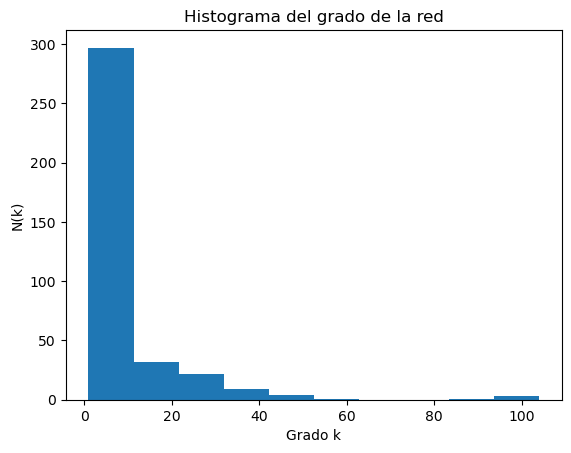

In [59]:
# Realizar el histograma
a=plt.hist(grado)
plt.title('Histograma del grado de la red')
plt.xlabel ("Grado k")
plt.ylabel ("N(k)")
plt.show()

De la distribución podemos ver que la gran mayoria de nodos tiene un grado menor a 20, y son pocos nodos que tienen un grado de 100.

<a id = "diametro"></a>
### Diametro de la red

El diametro de la red esta definido como la distancia más larga entre las distancias más cortas.

Antes de calcular el diametro es importante conprender tres conceptos importantes de las redes:
1. Una red está **conectada** si es posible ir de cualquier nodo $i$ a cualquier nodo $j$.
2. Una red está **fuertemente conectada** si es posible ir de cualquier nodo $i$ a cualquier nodo $j$ respetando la dirección de los arcos.
3. Una red está **debilmente conectada** si es posible ir de cualquier nodo $i$ a cualquier nodo $j$ sin respetar la dirección de los arcos, pero no se puede ir de cualquier nodo $i$ a cualquier nodo $j$ respetando la dirección de los arcos.

Para calcular el diametro es necesario que la red este fuertemente conectada, es decir se pueda alcanzar todos los nodos desde cualquier nodo. Podemos validar que la red esté fuertemente conectada mediante la función ``nx.is_strongly_connected(G)``, la cual regresa un booleano validando si la red está fuertemente conectada o no.

In [60]:
# Verificar que el grafo esté fuertemente conectado
nx.is_strongly_connected(G)

False

Ahora, como la red en la que se que se está trabajando es dirigida, significa que al seguir el sentido de los arcos no se puede llegar a todos los nodos, por lo que la red no esta fuertemente conectada. Para corregir esto y calcular el diametro podemos transformar la red en un no dirigida usando la función ``G.to_undirected()``, y guardando la red resultante en ``H``.

In [61]:
# Convirtamos el grafo en uno no dirigido
H = G.to_undirected()

Una vez convertida en no dirigiada, validemos que la red esté completamente conectada, para lo cual usamos la función ``nx.is_connected(H)``, que regresa un booleano confirmando si la red esta o no conectada.

In [62]:
# El grado está conectado
nx.is_connected(H)

True

Dado que la red está conectada y es no dirigida podemos calcular todas las distancias más cortas entre todo par de nodos en la red. Para esto podemos usar la función ``nx.all_pairs_shortest_path(H)``, y guardar el generador de todas las rutas entre el origen y el destino en un diccionario.

In [63]:
# Calculemos todo las distancias más cortas entre todos los nodos
path = dict(nx.all_pairs_shortest_path(H))

Con los caminos más cortos encontrados busquemos el más largo.

In [64]:
#Encontremos la distancia más larga
mayor_distancia=0
for i in H.nodes():
    for j in H.nodes():
        if i != j:
            if len(path[i][j]) > mayor_distancia:
                mayor_distancia=len(path[i][j])-1
                
print('El diametro de la red es', mayor_distancia)

El diametro de la red es 4


Ahora sabemso que el diametro de la red es *4*.

Networkx, nos ayuda en este proceso y podemos encontrar facilmente el diametro de la red con la función ``nx.diameter(H)``.

In [65]:
# Por medio de las funciones de Networkx
nx.diameter(H)

4

*Resultado esperado:* ``4``.

<a id = "densidad"></a>
### Densidad de la red

La densidad para grafos no dirigidos está definida como:

$$d = \frac{2m}{n(n-1)}$$

y para grafos dirigidos es:

$$d = \frac{m}{n(n-1)}$$

donde $n$ es el número de nodos y $m$ es el número de aristas en la red. En otras palabras, la densidad nos dice que propoción de conexiones posibles entre los nodos de la red  existen.

Para calcular la densidad de la red podemos usar la fórmula.

In [66]:
# No olviden que es una red dirigida
densidad=nx.number_of_edges(G)/(nx.number_of_nodes(G)*(nx.number_of_nodes(G)-1))
densidad

0.011679627665841876

*Resultado esperado:* ``0.01167``.

También podemos usar la función de NetworkX ``nx.density(G)``.

In [67]:
# Función de NetworkX
nx.density(G)

0.011679627665841876

*Resultado esperado:* ``0.01167``.

Esto nos dice que de todas las conexiones posibles en la red solo el 1.1% de estas existe en la red.

<a id = "reciprocidad"></a>
### Reciprocidad de la red

La reciprocidad de una red dirigida se define como el porcentaje de relaciones que van en ambos sentidos entre todo par de nodos conectados en la red. Formalmente,

$$r = \frac{|{(u,v) \in G|(v,u) \in G}|}{|{(u,v) \in G}|}$$

Usemos la función ``nx.reciprocity(G)``.

In [68]:
nx.reciprocity(G)

0.32156368221941994

*Resultado esperado:* ``0.3215``.

Esto nos dice que de todas las conexiones que hay en la red el 32.15% de estas son reciprocas o bidireccionales.

<a id = "asortatividad"></a>
### Asortatividad

El coeficiente de asortividad es el coeficiente de correlación de Pearson de grado entre pares de nodos conectados. Los valores positivos de r indican una correlación entre nodos de grado similar, mientras que los valores negativos indican relaciones entre nodos de diferente grado.<br>

En otras palabras, la asociatividad mide la similitud de las conexiones en el grafo con respecto al grado del nodo.<br>

*M. E. J. Newman, Mixing patterns in networks, Physical Review E, 67 026126, 2003*

Usamos la función ``nx.degree_assortativity_coefficient(G)``.

In [69]:
nx.degree_assortativity_coefficient(G)

-0.30740130094924506

*Resultado esperado:* ``-0.3074``.

**Ejercicio**: Encuentre la asortatividad del subgrafo formado por solo los políticos ("Politician").

In [71]:
## Escriba su código aquí

politician=[]

category=nx.get_node_attributes(G,'category')

for i in category.keys():
    if category[i] == 'Politician':
        politician.append(i)

PP = G.subgraph(politician)

nx.degree_assortativity_coefficient(PP)

-0.386741655870962

*Resultado esperado:* ``-0.3867``.